Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/Datasets/winequality-white.csv')

In [102]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


splitting the data

In [29]:
x=data.iloc[:,:-1]

In [30]:
y=data.iloc[:,-1]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

scaling the train data input

In [32]:
ss= StandardScaler()

In [103]:
ss.fit(x_train)


StandardScaler()

In [34]:
x_test_scaled=ss.transform(x_test)

In [35]:
x_train_scaled=ss.transform(x_train)

setting mode

In [36]:
model=Sequential()

In [ ]:
model.add(Dense(32,activation='relu',input_shape=(x_train_scaled.shape[1],)))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.add(Dense(16,activation='relu'))


In [89]:
model.add(Dense(1,activation='linear'))

In [90]:
history=model.compile(optimizer='adam',loss='mse',metrics=['mae'])

training

In [98]:
history=model.fit(x_train_scaled,y_train,epochs=25,batch_size=15,validation_split=0.2)

Epoch 1/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4714 - mae: 0.5402 - val_loss: 0.5376 - val_mae: 0.5564
Epoch 2/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4794 - mae: 0.5425 - val_loss: 0.5225 - val_mae: 0.5534
Epoch 3/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4523 - mae: 0.5266 - val_loss: 0.5205 - val_mae: 0.5444
Epoch 4/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4612 - mae: 0.5300 - val_loss: 0.5344 - val_mae: 0.5545
Epoch 5/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4370 - mae: 0.5178 - val_loss: 0.5236 - val_mae: 0.5508
Epoch 6/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4421 - mae: 0.5247 - val_loss: 0.5255 - val_mae: 0.5588
Epoch 7/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4346 - mae: 0.5153 - val_loss: 0.5473 - val_mae: 0.5702
Epoch 8/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4250 - mae: 0.5170 - val_loss: 0.5279 - val_mae: 0.5610
Epoch 9/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

making prediction on the test set and then r2_score

In [99]:
y_pred=model.predict(x_test_scaled)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [100]:
r2=r2_score(y_test,y_pred)

In [101]:
r2

0.3422786593437195

plotting


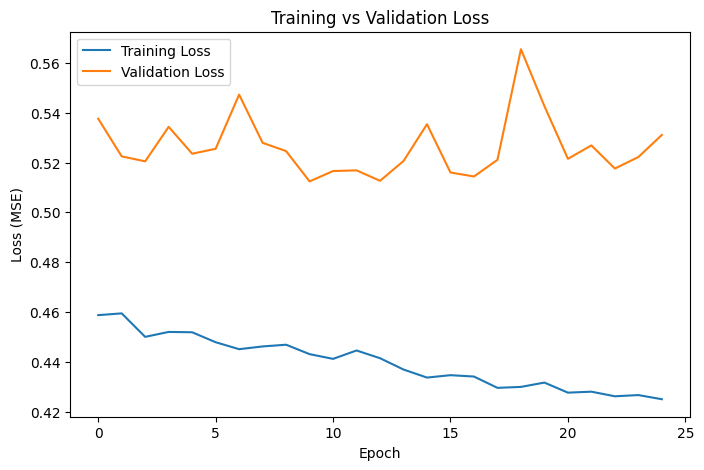

In [104]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

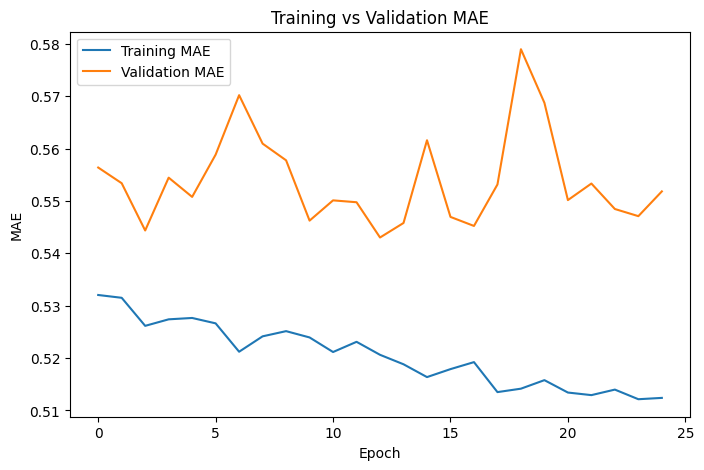

In [105]:
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


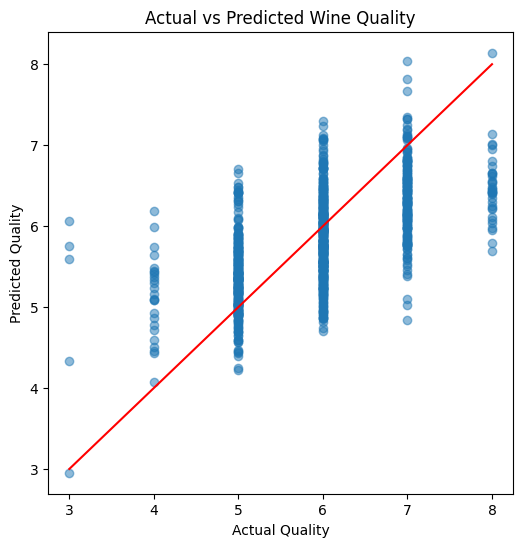

In [106]:
y_pred = model.predict(x_test_scaled).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')  # ideal line
plt.show()